In [11]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

In [21]:
def f1(x):
    with np.errstate(divide='ignore', invalid='ignore'):
        return 1/x
fx_name = r'$f(x)=\frac{1}{x}$'


def f2(rr):
    # theta goes from 0 to 2pi
    theta = np.linspace(0, 2*np.pi, 1000)
    # the radius of the circle
    r = np.sqrt(rr)
    # compute x1 and x2
    x2 = r*np.cos(theta)
    y2 = r*np.sin(theta)
    return (x2,y2)

<IPython.core.display.Javascript object>


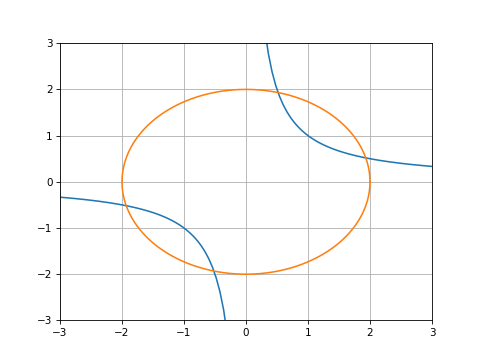

In [22]:
import numpy as np
import matplotlib.pyplot as plt

x1 = np.linspace(-3,3,101)
y1=f1(x1)
x2,y2 = f2(4)

fig2, ax1 = plt.subplots()
ax1.plot(x1, y1, label=fx_name)
ax1.plot(x2, y2, label=fx_name)
# plt.legend(loc='upper left')
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.grid(True)
plt.show()

In [103]:
import numpy as np
from numpy import cos, sin, pi, exp

def Newton_system(F, J, x, eps):
    """
    Solve nonlinear system F=0 by Newton's method.
    J is the Jacobian of F. Both F and J must be functions of x.
    At input, x holds the start value. The iteration continues
    until ||F|| < eps.
    """
    F_value = F(x)
    F_norm = np.linalg.norm(F_value, ord=2)  # l2 norm of vector
    iteration_counter = 0
    print(x, F_norm)
    while abs(F_norm) > eps and iteration_counter < 100:
        delta = np.linalg.solve(J(x), -F_value)
        x = x + delta
        F_value = F(x)
        F_norm = np.linalg.norm(F_value, ord=2)
        iteration_counter += 1
        print(x, F_norm)

    # Here, either a solution is found, or too many iterations
    if abs(F_norm) > eps:
        iteration_counter = -1
    return x, iteration_counter

In [104]:
def test_Newton_system1(g1,g2):
    
#     def F(x):
#         return np.array(
#             [x[0]**2 + x[1]**2 - 4,
#              x[0]*x[1] - 1])

#     def J(x):
#         return np.array(
#             [[2*x[0], 2*x[1]],
#              [x[1], x[0]]])

    def F(x):
        return np.array(
            [x[0]**2 - x[1] + x[0]*cos(pi*x[0]),
             x[0]*x[1] + exp(-x[1]) - x[0]**(-1)])

    def J(x):
        return np.array(
            [[2*x[0] + cos(pi*x[0]) - pi*x[0]*sin(pi*x[0]), -1],
             [x[1] + x[0]**(-2), x[0] - exp(-x[1])]])

    expected = np.array([1, 0])
    tol = 1e-4
    x, n = Newton_system(F, J, x=np.array([g1, g2]), eps=0.0001)
#     print (n, x)
#     print(x)
    error_norm = np.linalg.norm(expected - x, ord=2)
#     assert error_norm < tol, 'norm of error =%g' % error_norm
    print ('norm of error =%g' % error_norm)

In [105]:
test_Newton_system1(2.,0)

[2. 0.] 6.020797289396148
[ 0.76190476 -0.19047619] 0.32640985166255865
[ 0.94172846 -0.12858323] 0.10046549579611873
[ 1.00984832 -0.01450897] 0.02676317432318177
[ 9.99860000e-01 -7.41489018e-04] 0.0006175989484369556
[1.00000036e+00 2.42729235e-07] 3.7814278533487137e-07
norm of error =4.33873e-07


In [57]:
from sympy import *

x0, x1 = symbols('x0 x1')
F0 = x0**2 + x1**2 - 4
F1 = x0*x1 - 1

# diff(F0, x0)
# diff(F0, x1)
# diff(F1, x0)
diff(F1, x1)

x0